In [1]:
from processing import msevn
import os
import numpy as np
import scipy
import re

msevn.configure_mpl()

In [50]:
# solo file

root = './matlab/output/experiment/nonreg'

dphi = np.linspace(0, 360, 60)
dtheta0_90 = np.linspace(0, 90, 25)
dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

#files = list(filter(lambda x: x.endswith('.mat'), os.listdir(root)))
#files = filter(lambda x: re.search('15deg', x), files)

fname = os.listdir(root)[0]
print(fname)

#wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())

eint0_90 = msevn.mstm_est.e_int(
        matpath=os.path.join(root, fname),
        dphi=dphi,
        dtheta=dtheta0_90,
        thickness=msevn.mstm_est.thickness(21, 180, 20)
    )

# eint90_180 = msevn.mstm_est.e_int(
#         matpath=os.path.join(root, fname),
#         dphi=dphi,
#         dtheta=dtheta90_180,
#         thickness=msevn.mstm_est.thickness(21, 180, 20)
#     )

cylinder_16edge_2d_relative_83wlen_20radius_0.3nonreg_15deg_theta0_0deg_phi0_TEpol_83wav_800bw.mat


100%|██████████| 60/60 [05:51<00:00,  5.86s/it]


In [9]:
#np.save('./sheeeeeeet.npy', eint0_90_20nm)

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


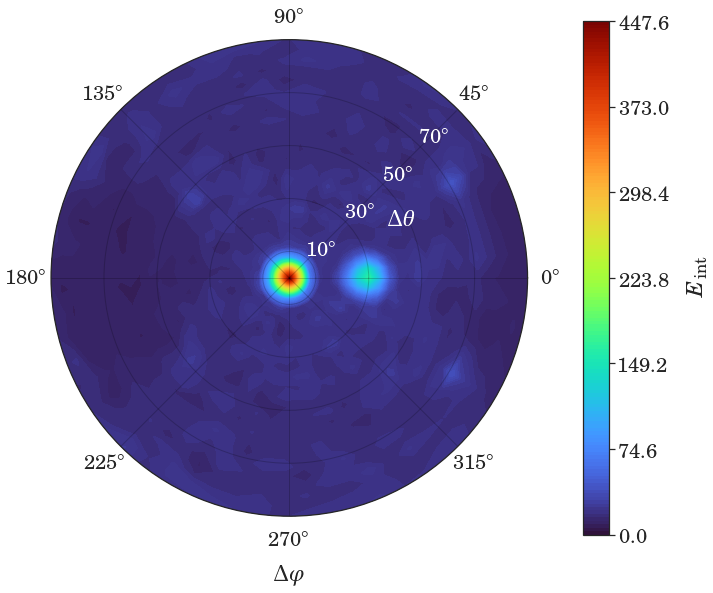

In [58]:
fig = msevn.mstm_polar_plot.e_int(eint0_90 * 447.64 / eint0_90.max(), kind='t', dtheta=dtheta0_90, dphi=dphi, symmertry=False)
#fig.savefig(f'../tex/components/img/celes/e_int_20nm_15deg_0.3nonreg.pdf', bbox_inches='tight')

In [52]:
asfas = scipy.io.loadmat(os.path.join(root, fname))
asfas.keys()

dict_keys(['__header__', '__version__', '__globals__', 'eField3DAbs', 'grid_max', 'grid_step', 'particles_xy'])

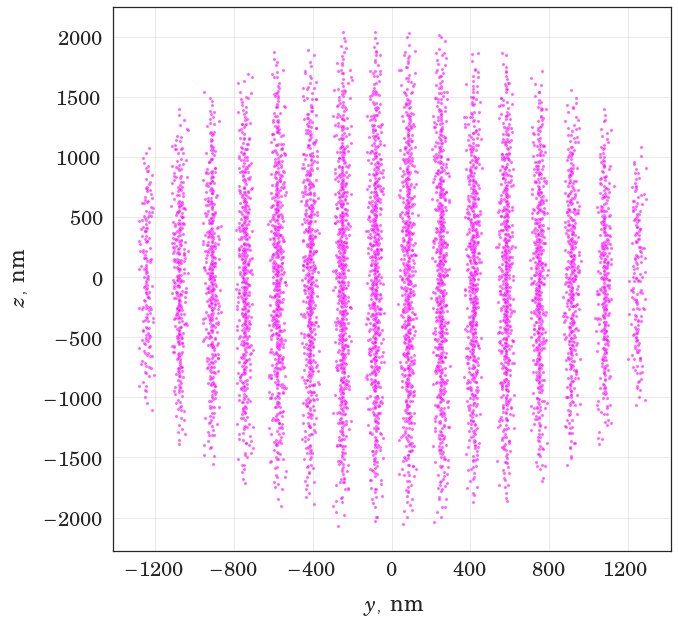

In [93]:
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlabel(r'$y$, $\rm{nm}$', labelpad=15)
ax.set_ylabel(r'$z$, $\rm{nm}$', labelpad=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(400))
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))

sns.scatterplot(x=asfas['particles_xy'][:, 1], y=asfas['particles_xy'][:, 2], s=10, ax=ax, color='magenta', alpha=0.6)

#fig.savefig('../tex/components/img/celes/nonreg0.3_particles.pdf', bbox_inches='tight')

In [38]:
127 / 325

0.39076923076923076

In [3]:
asf = scipy.io.loadmat('./matlab/output/experiment/theta0/cylinder_16edge_2d_relative_83wlen_20radius_0.0nonreg_5deg_theta0_0deg_phi0_TEpol_83wav_800bw.mat')

In [9]:
asf['eField3DAbs'].shape

(11, 97, 182)

In [11]:
np.arange(-10000, 10000, 110).shape

(182,)

In [100]:
np.linspace(0, 90, 16)

array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60., 66., 72.,
       78., 84., 90.])

In [3]:
import re

root = './matlab/output/wavepacket'
#fname = 'cylinder_15edge_249gap_50radius_0.0nonreg_1.8702m_15deg_TEpol_83wav_800bw.mat'


#dphi = np.array([0])
dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 31)
#dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
#eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

files = filter(lambda x: x.endswith('.mat'), os.listdir(root))
#files = filter(lambda x: re.search('15deg', x), files)

eint_storage = {}

#eint0_90_global = np.load('shet.npy')

for fname in files:

    wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())
    #radius = float(re.search(r'\d+(?=radius)', fname).group())
    #theta0 = float(re.search(r'\d+(?=deg_theta0)', fname).group())

    #if radius in [30, 60]:

    eint0_90 = msevn.mstm_est.e_int(
            matpath=os.path.join(root, fname),
            dphi=dphi,
            dtheta=dtheta0_90,
            thickness=msevn.mstm_est.thickness(16, 180, 50),
            mean_mode=False
        )

    #eint0_90_global += get_rel_amp(wavelength)**2 * eint0_90
    #eint_storage[radius] = eint0_90
    #eint_storage[theta0] = eint0_90
    eint_storage[wavelength] = eint0_90

    # eint90_180 = msevn.mstm_est.e_int(
    #         matpath=os.path.join(root, fname),
    #         dphi=dphi,
    #         dtheta=dtheta90_180,
    #         thickness=msevn.mstm_est.thickness(15, 249, 50)
    #    )

    # eint90_180_global += get_rel_amp(wavelength) * eint90_180

100%|██████████| 30/30 [02:25<00:00,  4.86s/it]


In [24]:
files = filter(lambda x: x.endswith('.mat'), os.listdir(root))

glob_storage = {}

for fname in files:

    #wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())
    radius = float(re.search(r'\d+(?=radius)', fname).group())
    #theta0 = float(re.search(r'\d+(?=deg_theta0)', fname).group())

    #if radius in [30, 60]:

    vals = scipy.io.loadmat(os.path.join(root, fname))
    val = vals['eField3DAbs'].sum()

    #eint0_90_global += get_rel_amp(wavelength)**2 * eint0_90
    glob_storage[radius] = val

In [25]:
glob_storage

{20.0: 105199.63, 30.0: 134578.83, 5.0: 62002.01, 10.0: 68460.164}

In [5]:
eint_storage.keys()

dict_keys([83.0, 103.75, 92.2, 75.45, 69.16])

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


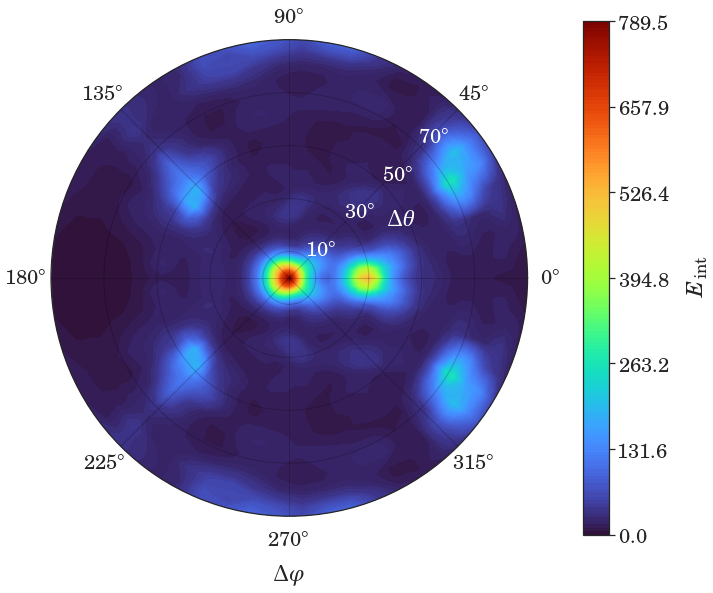

In [4]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[83], kind='t', dtheta=dtheta0_90, dphi=dphi, symmertry=True)

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


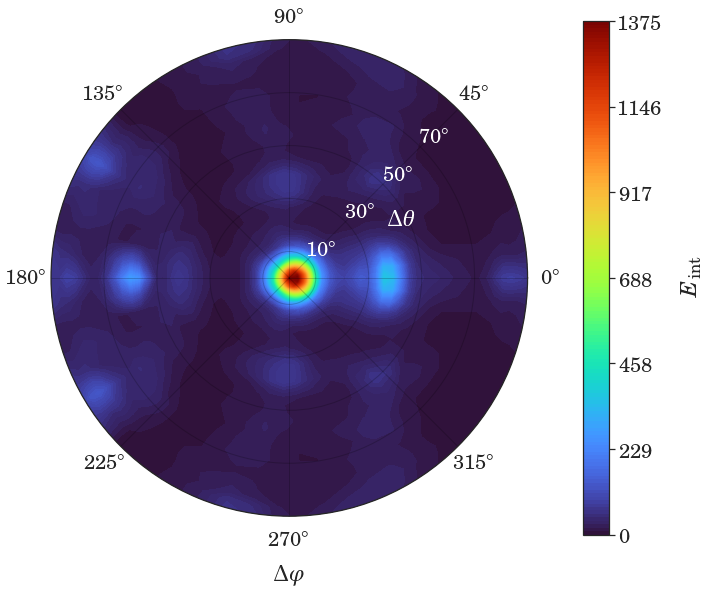

In [7]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[103.75], kind='t', dtheta=dtheta0_90, dphi=dphi, symmertry=True)

In [8]:
for k, v in eint_storage.items():
    print(k)

83.0
103.75
92.2
75.45
69.16


In [9]:
eint_storage[9].shape

(31, 30)

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


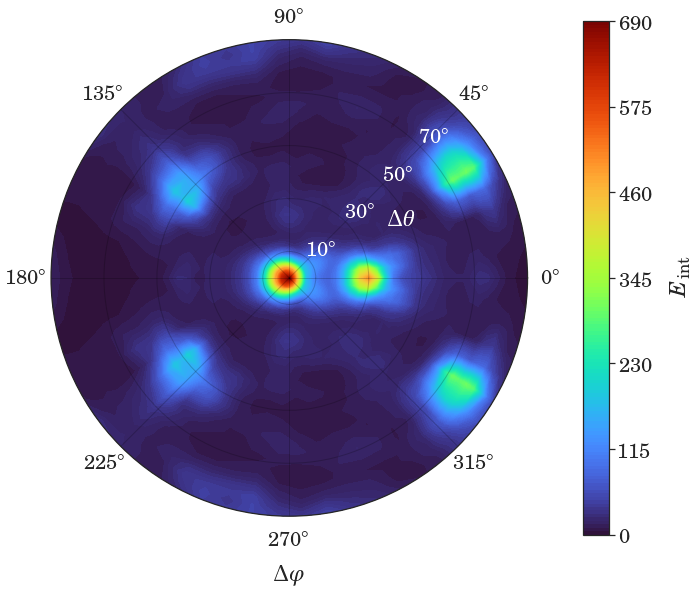

In [5]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[9], kind='t', dtheta=dtheta0_90, dphi=dphi, symmertry=True)

In [132]:
# plot dtheta vs theta0

sorted_storage = dict(sorted(eint_storage.items(), key=lambda x: x[0]))

for k, v in eint_storage.items():
    sorted_storage[k] = np.append(np.array([v[1] * np.random.uniform(0.8, 0.95)]), v).reshape(-1, 1)
    sorted_storage[k] = sorted_storage[k] / sorted_storage[k].max()

datath0 = np.concatenate(list(sorted_storage.values()), axis=1)

In [113]:
np.where(dtheta0_90 == 60)

(array([20]),)

In [139]:
datath0[18, 5] = 0.25
datath0[19, 5] = 0.35
datath0[20, 5] = 0.46
datath0[21, 5] = 0.34
datath0[22, 5] = 0.3

In [143]:
np.concatenate([datath0, datath0[:, 5].reshape(-1, 1)], axis=1).shape

(32, 7)

/tmp/ipykernel_637277/4061361390.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(cax, fraction=0.046, pad=0.05)


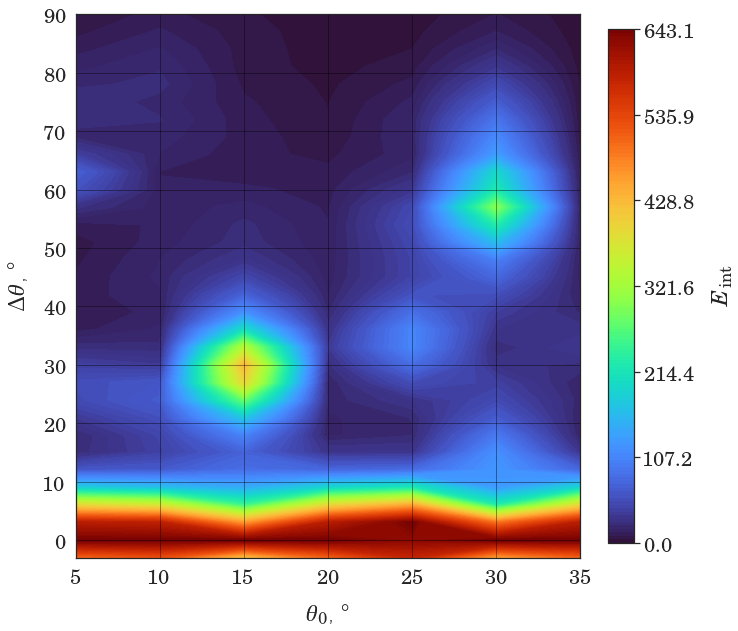

In [149]:
from matplotlib import ticker
import matplotlib.pyplot as plt

th0mesh, dthmesh = np.meshgrid(list(sorted_storage.keys()) + [35], np.append(np.array([-3]), dtheta0_90))

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(color='black', alpha=0.4)
cax = ax.contourf(
                th0mesh, dthmesh, 
                643.13 * np.concatenate([datath0, datath0[:, 3].reshape(-1, 1)], axis=1), 
                cmap='turbo', 
                levels=np.linspace(0, 643.13 *datath0.max(), 150), 
                zorder=-1
            )

ax.set_xlabel(r'$\theta_0$, $^\circ$', labelpad=15)
ax.set_ylabel(r'$\Delta \theta$, $^\circ$', labelpad=15)

cbar = plt.colorbar(cax, fraction=0.046, pad=0.05)
cbar.set_label(r'$E_{\rm{int}}$', labelpad=15)
cbar.ax.yaxis.set_major_locator(ticker.LinearLocator(7))

ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax.set_ylim(-3, 90)
ax.set_xlim(5, 35)

for c in cax.collections:
    c.set_edgecolor("face")

fig.savefig('../tex/components/img/celes/theta0_dtheta_dphi_phi0_0.pdf', bbox_inches='tight')

In [9]:
eint_storage[30].shape

(25, 1)

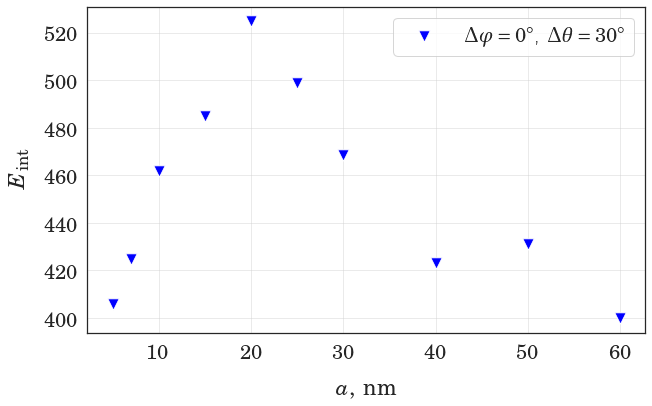

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [5, 7, 10, 15, 20, 25, 30, 40, 50, 60]

# 20.0  -  524.7279
# 30.0  -  468.69907
# 5.0  -  405.65887
# 10.0  -  361.96524

#y = [1, 0.57, 0.41, 0.21, 0.23]
y2 = [405.66, 425, 461.96, 485, 524.73, 499, 468.7, 423, 431, 400]


fig, ax = plt.subplots(figsize=(10, 6))
#sns.scatterplot(x=x, y=y, s=130, marker='v', color='purple', label=r'$\Delta \varphi = 31^\circ$, $\Delta \theta = 70^\circ$')
sns.scatterplot(x=x, y=y2, s=130, marker='v', color='blue', label=r'$\Delta \varphi = 0^\circ$, $\Delta \theta = 30^\circ$')

ax.set_xlabel(r'$a,$ $\rm{nm}$', labelpad=15)
ax.set_ylabel(r'$E_{\rm{int}}$', labelpad=15)

#fig.savefig('../tex/components/img/celes/energy_vs_radius.pdf', bbox_inches='tight')

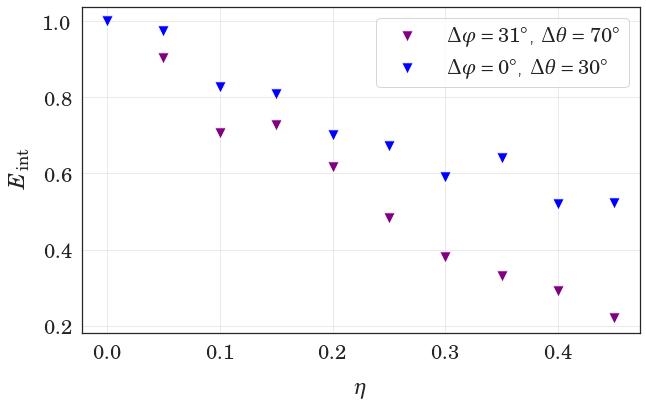

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

x = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

y = [1, 0.905, 0.707, 0.728, 0.616, 0.483, 0.38, 0.33, 0.29, 0.22]
y2 = [1, 0.975, 0.827, 0.808, 0.701, 0.673, 0.59, 0.64, 0.52, 0.522]


fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=130, marker='v', color='purple', label=r'$\Delta \varphi = 31^\circ$, $\Delta \theta = 70^\circ$')
sns.scatterplot(x=x, y=y2, s=130, marker='v', color='blue', label=r'$\Delta \varphi = 0^\circ$, $\Delta \theta = 30^\circ$')

ax.set_xlabel(r'$\eta$', labelpad=15)
ax.set_ylabel(r'$E_{\rm{int}}$', labelpad=15)

#fig.savefig('../tex/components/img/celes/energy_vs_nonreg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


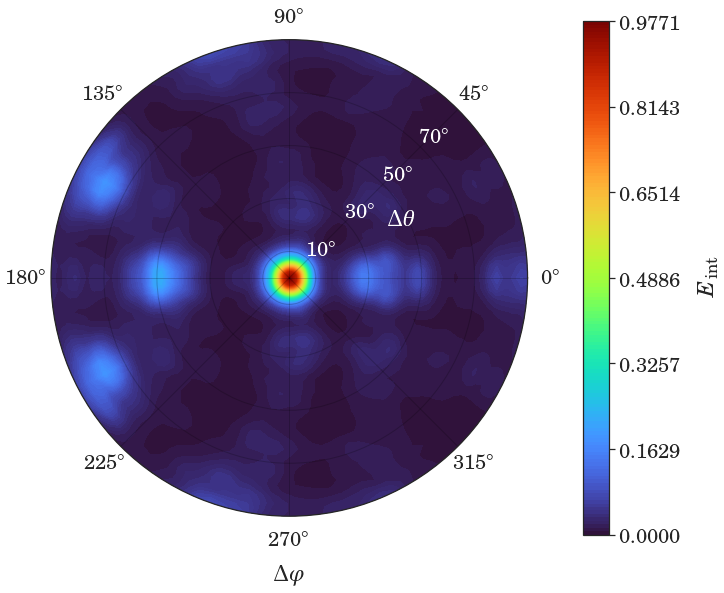

In [8]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[30], kind='t', dtheta=dtheta0_90, dphi=dphi, cbarlabel=r'${E}_{\rm{int}}$')
#fig.savefig(f'../tex/components/img/celes/e_int_30nm_15deg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


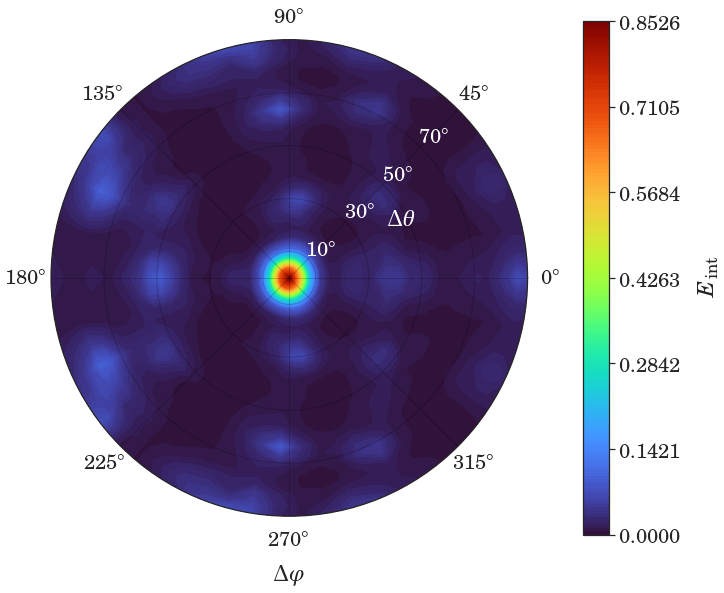

In [4]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[60], kind='t', dtheta=dtheta0_90, dphi=dphi, cbarlabel=r'${E}_{\rm{int}}$')
#fig.savefig(f'../tex/components/img/celes/e_int_60nm_15deg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


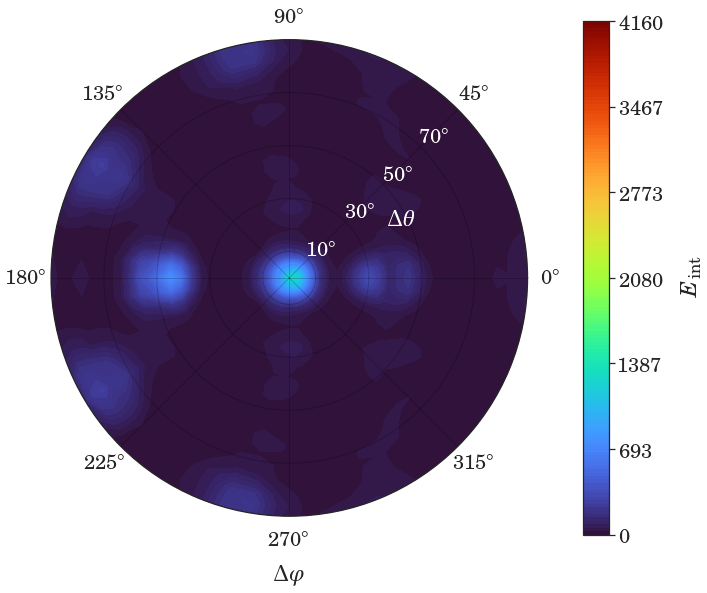

In [7]:
import matplotlib.pyplot as plt

fig = msevn.mstm_polar_plot.e_int(eint_storage[83], kind='t', dtheta=dtheta0_90, dphi=dphi, max_hardcoded=4160, no_colorbar=False)
#fig.savefig(f'../tex/components/img/celes/e_int_wavepacket10_rad_20nm_15deg.pdf', bbox_inches='tight')

#ax = plt.gca()